In [1]:
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import os
import numpy as np
import powerlaw
import math

## read dataset function

In [27]:
def load_flle(filename):
    x = []
    with open(filename) as f:
        line = f.readline()
        line = line.strip('\n')
    return line

def dirlist(path, files):
    filelist = os.listdir(path)

    for filename in filelist:
        filepath = os.path.join(path, filename)
        if os.path.isdir(filepath):
            dirlist(filepath, files)
        else:
            files.append(filepath)
    return files

def load_train_files(path):
    x = []
    y = []
    list = os.listdir(path)
    for i in range(0, len(list)):
        path2 = os.path.join(path, list[i])
        if os.path.isfile(path2):
            x.append(load_flle(path2))
            y.append(0)
    return x, y


def load_attack_files(path, x, y, attack_type):
    total = 0
    for i in range(1,11):
        files = dirlist(path + attack_type +"_" + str(i), [])
        total = total + len(files)
        for file in files:
            x.append(load_flle(file))
            y.append(1)
    print(attack_type + " data: " + str(total))
    return x, y

def get_increasing_array(length):
    arr = np.zeros(length)
    for i in range(length):
        arr[i] = i
    return arr

## read data

In [28]:
attack_type = ['Adduser', 'Hydra_FTP', 'Hydra_SSH', 'Java_Meterpreter', 'Meterpreter', 'Web_Shell']
xa = []
ya = []
for attack in attack_type:
    xa, ya = load_attack_files("ADFA-LD/Attack_Data_Master/", xa, ya, attack)
xt, yt = load_train_files("ADFA-LD/Training_Data_Master/")  
xv, yv = load_train_files("ADFA-LD/Validation_Data_Master/")  
x_trn = xt + xa
y_trn = yt + ya
x_val = xv 
y_val = yv 


Adduser data: 91
Hydra_FTP data: 162
Hydra_SSH data: 176
Java_Meterpreter data: 124
Meterpreter data: 75
Web_Shell data: 118


## Parameter

In [53]:
n = 2
left = 0
right = 10

### Normal

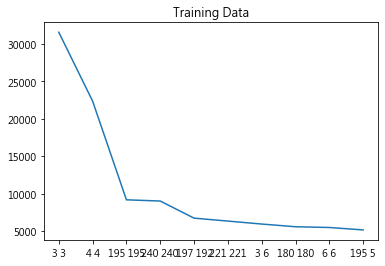

('3 3', '4 4', '195 195', '240 240', '197 192', '221 221', '3 6', '180 180', '6 6', '195 5')
(31531, 22334, 9163, 8999, 6716, 6325, 5928, 5569, 5468, 5145)


In [54]:
dic_normal = defaultdict(lambda: 0)
for d in xt:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_normal[index] = dic_normal[index] + 1

lists = sorted(dic_normal.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Training Data")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### adduser

Adduser data: 91


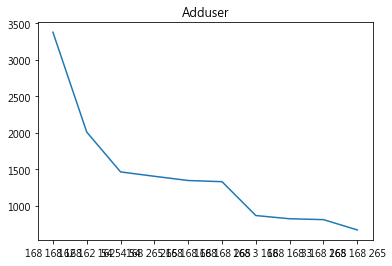

('168 168 168', '162 162 162', '54 54 54', '168 265 168', '265 168 168', '168 168 265', '168 3 168', '168 168 3', '3 168 168', '265 168 265')
(3380, 2012, 1466, 1406, 1348, 1332, 868, 824, 812, 671)


In [31]:
dic_addusr = defaultdict(lambda: 0)
x_addusr = []
y_addusr = []
x_addusr, y_addusr = load_attack_files("ADFA-LD/Attack_Data_Master/", x_addusr, y_addusr, 'Adduser')
for d in x_addusr:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_addusr[index] = dic_addusr[index] + 1

lists = sorted(dic_addusr.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Adduser")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### Hydra FTP

Hydra_FTP data: 162


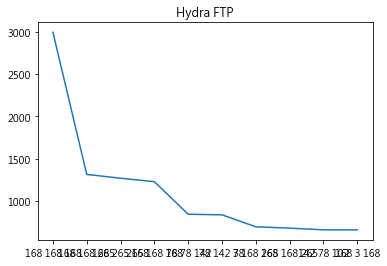

('168 168 168', '168 168 265', '168 265 168', '265 168 168', '78 78 142', '78 142 78', '3 168 168', '265 168 265', '142 78 102', '168 3 168')
(2992, 1314, 1269, 1228, 844, 837, 696, 680, 660, 659)


In [32]:
dic_ftp = defaultdict(lambda: 0)
x_ftp = []
y_ftp = []
x_ftp, y_ftp = load_attack_files("ADFA-LD/Attack_Data_Master/", x_ftp, y_ftp, 'Hydra_FTP')
for d in x_ftp:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_ftp[index] = dic_ftp[index] + 1

lists = sorted(dic_ftp.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Hydra FTP")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### Hydra SSH

Hydra_SSH data: 176


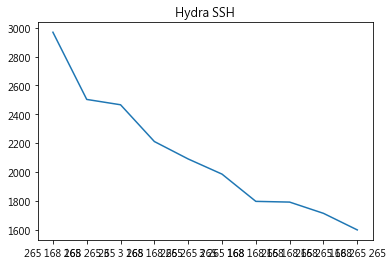

('265 168 265', '168 265 3', '265 3 265', '168 168 265', '265 265 265', '3 265 168', '168 168 168', '265 168 168', '265 265 168', '168 265 265')
(2969, 2503, 2466, 2211, 2090, 1985, 1796, 1791, 1713, 1598)


In [33]:
dic_ssh = defaultdict(lambda: 0)
x_ssh = []
y_ssh = []
x_ssh, y_ssh = load_attack_files("ADFA-LD/Attack_Data_Master/", x_ssh, y_ssh, 'Hydra_SSH')
for d in x_ssh:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_ssh[index] = dic_ssh[index] + 1

lists = sorted(dic_ssh.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Hydra SSH")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### Java Meterpreter

Java_Meterpreter data: 124


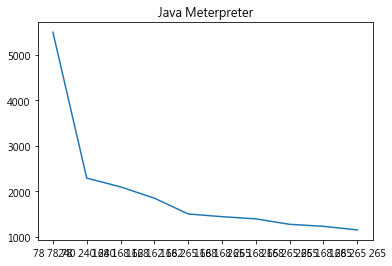

('78 78 78', '240 240 240', '168 168 168', '162 162 162', '168 265 168', '168 168 265', '265 168 168', '265 265 265', '265 168 265', '168 265 265')
(5497, 2288, 2095, 1846, 1499, 1439, 1391, 1271, 1227, 1148)


In [34]:
dic_java = defaultdict(lambda: 0)
x_java = []
y_java = []
x_java, y_java = load_attack_files("ADFA-LD/Attack_Data_Master/", x_java, y_java, 'Java_Meterpreter')
for d in x_java:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i + n])
        dic_java[index] = dic_java[index] + 1

lists = sorted(dic_java.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Java Meterpreter")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### Meterpreter

Meterpreter data: 75


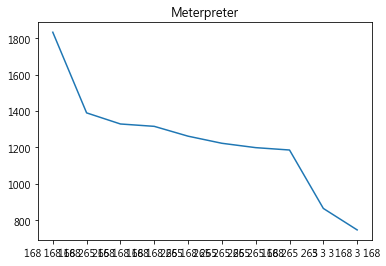

('168 168 168', '168 265 168', '265 168 168', '168 168 265', '265 168 265', '265 265 265', '265 265 168', '168 265 265', '3 3 3', '168 3 168')
(1833, 1390, 1329, 1316, 1262, 1223, 1199, 1186, 865, 747)


In [35]:
dic_met = defaultdict(lambda: 0)
x_met = []
y_met = []
x_met, y_met = load_attack_files("ADFA-LD/Attack_Data_Master/", x_met, y_met, 'Meterpreter')
for d in x_met:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_met[index] = dic_met[index] + 1

lists = sorted(dic_met.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Meterpreter")
plt.plot(px, py)
plt.show()
print(px)
print(py)


### Web Shell

Web_Shell data: 118


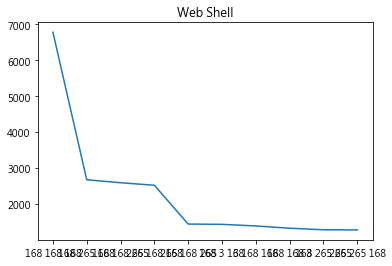

('168 168 168', '168 265 168', '168 168 265', '265 168 168', '265 168 265', '168 3 168', '3 168 168', '168 168 3', '168 265 265', '265 265 168')
(6782, 2674, 2592, 2521, 1441, 1433, 1388, 1325, 1282, 1278)


In [36]:
dic_web = defaultdict(lambda: 0)
x_web = []
y_web = []
x_web, y_web = load_attack_files("ADFA-LD/Attack_Data_Master/", x_web, y_web, 'Web_Shell')
for d in x_web:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_web[index] = dic_web[index] + 1

lists = sorted(dic_web.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Web Shell")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### 攻擊序列中 n-gram之累積數分布與power law

### n = 1 的情況 

90


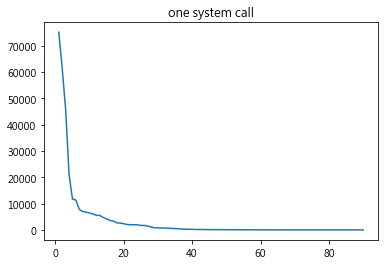

(75175, 61396, 45819, 21125, 11782, 11316, 7781, 6992, 6751, 6446, 6071, 5552, 5506, 4725, 4191, 3579, 3322, 2695, 2582, 2369, 2046, 1974, 1971, 1952, 1697, 1694, 1452, 1133, 795, 756, 750, 724, 630, 574, 519, 430, 347, 294, 254, 225, 162, 161, 157, 125, 112, 112, 103, 103, 88, 71, 68, 68, 67, 63, 62, 58, 55, 49, 47, 33, 27, 26, 18, 18, 18, 16, 16, 13, 13, 10, 7, 6, 6, 5, 5, 4, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1)
alpha: 2.021106382776984
Xmin: 4191.0


Calculating best minimal value for power law fit
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substi

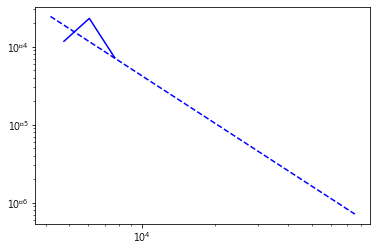

In [130]:
n = 1
dic_xa = defaultdict(lambda: 0)

#對 n-gram的組合做統計並存到字典
for d in xa:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_xa[index] = dic_xa[index] + 1

lists = sorted(dic_xa.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists) # unpack a list of pairs into two tuples
print(len(lists))

#生成一個[1,2,3,4,5,......,n]的陣列做x軸
x_axis = get_increasing_array(len(lists)+1)
plt.title("one system call")
plt.plot(x_axis[1:], py)
plt.show()
#print(px)
print(py)

#for i in range(len(a_axis)):
#    a_axis[1:]
#for 
#PLNumlog[i] = math.log10(PLNum[i])
#Numlog[i] = math.log10(Num[i])

results = powerlaw.Fit(py)
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

### n >= 2 的情況 

1413


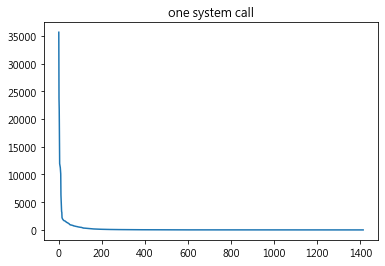

Calculating best minimal value for power law fit


alpha: 1.5584624335269894
Xmin: 21.0


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

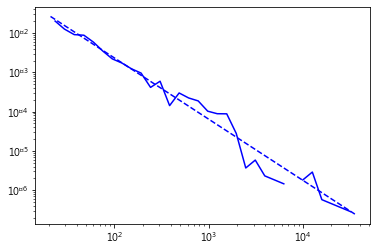

In [151]:
n = 2
dic_xa = defaultdict(lambda: 0)
for d in xa:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_xa[index] = dic_xa[index] + 1

lists = sorted(dic_xa.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists) # unpack a list of pairs into two tuples
print(len(lists))
x_axis = get_increasing_array(len(lists)+1)
plt.title("one system call")
plt.plot(x_axis[1:], py)
plt.show()
#print(px)


results = powerlaw.Fit(py)
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

In [152]:
print(py[:10])
print(px[:10])

(35641, 23700, 21761, 17595, 11949, 11703, 11454, 11223, 10588, 10097)
('168 168', '168 265', '265 168', '265 265', '3 265', '3 168', '3 3', '265 3', '168 3', '78 78')


3596


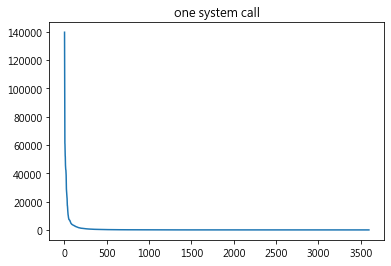

Calculating best minimal value for power law fit


alpha: 1.5652423623900238
Xmin: 90.0


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

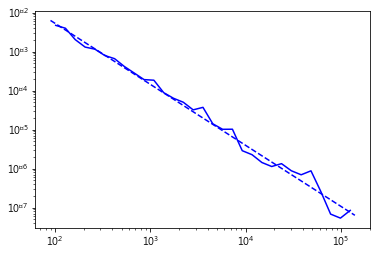

In [148]:
n = 2
dic_xn = defaultdict(lambda: 0) #normal data的字典
for d in xt:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_xn[index] = dic_xn[index] + 1

for d in xv:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_xn[index] = dic_xn[index] + 1
        
lists = sorted(dic_xn.items(), key=lambda kv: kv[1], reverse=True) 
px, py = zip(*lists)
print(len(lists))
x_axis = get_increasing_array(len(lists)+1)
plt.title("one system call")
plt.plot(x_axis[1:], py)
plt.show()


results = powerlaw.Fit(py)
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

In [150]:
print(py[:10])
print(px[:10])

(139613, 111942, 94252, 77614, 61335, 60429, 56242, 53216, 52146, 51671)
('3 3', '195 5', '5 195', '197 192', '192 192', '240 240', '5 3', '192 6', '4 4', '5 5')


## train data中system call序列長度分佈

In [141]:
train_len = []
for i in range(len(xa)):
    train_len.append(len(xa[i]))
train_len.sort()
Y = np.array(train_len)
print(len(Y))
print(Y)


746
[ 300  300  300  301  301  302  302  302  302  302  303  304  304  304
  306  306  306  306  306  307  307  308  308  308  308  309  310  310
  310  311  311  311  312  312  313  313  313  314  314  315  316  316
  317  319  320  320  320  320  320  320  323  323  323  324  325  325
  325  326  326  326  327  327  328  328  328  329  329  330  330  331
  331  332  333  334  335  335  336  336  336  336  337  337  337  338
  338  338  338  339  339  339  340  340  342  343  343  344  344  346
  348  348  349  349  350  351  351  351  352  354  354  355  356  356
  357  359  360  361  361  362  363  365  366  367  368  368  368  370
  375  376  376  378  379  379  380  380  382  384  385  386  386  386
  386  386  386  387  388  390  390  390  392  392  393  393  393  395
  395  395  396  397  398  398  398  398  400  400  401  404  408  408
  408  411  411  412  412  412  413  414  415  415  415  417  418  419
  422  425  425  425  428  428  429  429  429  430  431  432  434  435
  

## 特定system call 組合在train data中的單序列呼叫次數分佈

In [146]:
target = [168]
cmd_len = len(target)
cmd_index = ' '.join([str(v) for v in target])
commend_count = []
for d in xa:
    count = 0
    data = d.strip().split(' ')
    for i in range(len(d)):
        #print(' '.join(data[i:i+n]))
        if cmd_index == ' '.join(data[i:i+cmd_len]):
            count = count + 1
    commend_count.append(count)




In [ ]:
for d in xv:
    count = 0
    data = d.strip().split(' ')
    for i in range(len(d)):
        #print(' '.join(data[i:i+n]))
        if cmd_index == ' '.join(data[i:i+cmd_len]):
            count = count + 1
    commend_count.append(count)

1006
[0.000e+00 1.000e+00 2.000e+00 ... 1.003e+03 1.004e+03 1.005e+03]


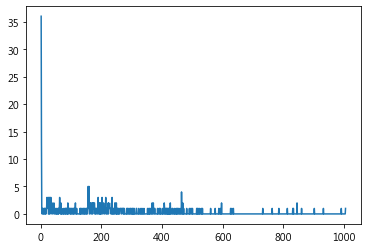

In [147]:
#print(max(commend_count))
#print(commend_count)
sta = np.zeros(max(commend_count)+1)
print(len(sta))
x_axis = np.zeros(max(commend_count)+1)
for i in range(max(commend_count)+1):
    x_axis[i] = i

for i in commend_count:
    sta[i] = sta[i] + 1
print(x_axis)
#print(len(x_axis))
#plt.plot(x_axis[1:-2500], sta[1:-2500])
plt.plot(x_axis[1:], sta[1:])
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha: 2.0045211627754993
Xmin: 1.0


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

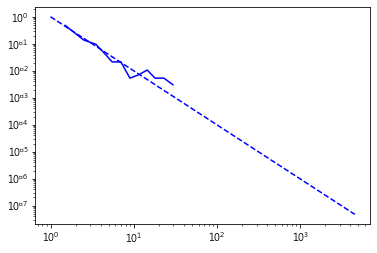

In [114]:
results = powerlaw.Fit(sta)
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')